In [5]:
import os
import io
from scipy import interpolate, stats
import RockPy3
import numpy as np
RockPy3.core.utils.setLatex()
%pylab osx

INFO     RockPy3         USING LATEX True: Computer Modern Roman


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
folder = '/Users/Mike/Dropbox/PHD/006_HT-ARM-AF/Dunlop_Bina_datapoints'
files = [i for i in os.listdir(folder) if i.endswith('.dat')]
figure_folder = '/Users/mike/Dropbox/PHD/006_HT-ARM-AF/figures'

In [7]:
data = {}
for f in files:
    sname = int(f.split('_')[0][:-1])/10
    temp = float(f.split('_')[1][:3])
    data.setdefault(sname, {})
    s = open(os.path.join(folder, f)).read().replace(',','.')
    data[sname][temp] = np.loadtxt(io.StringIO(s))

In [ ]:
print(data.keys())

In [8]:
for s in sorted(data):
    temps = sorted(data[s].keys())
    for t, v in sorted(data[s].items()):
        plot(v[:,0]/10, v[:,1], '.-', label='{:4.0f} K'.format(t), color = RockPy3.colorscheme[temps.index(t)])
    title('{} nm'.format(s))
    xlim(0,55)
    ylim(0,1)
    xlabel('AF field [mT]')
    ylabel('normalized moment')
    legend(loc='best', numpoints=1, frameon=False, handlelength=1)
    savefig(figure_folder+'/Dunlop1977({})_data.pdf'.format(s))
    show()

In [7]:
def calculate_sample(sname='760A'):
    temps = data[sname].keys()
    m0 = data[sname][min(temps)]
    vars = m0[:,1]
    out = {}
    for t, m in data[sname].items():
        if not t == min(temps):

            f = interpolate.interp1d(m[:,1], m[:,0], bounds_error=False)
            m = np.c_[f(vars), vars]
        out[t] = m
    return out

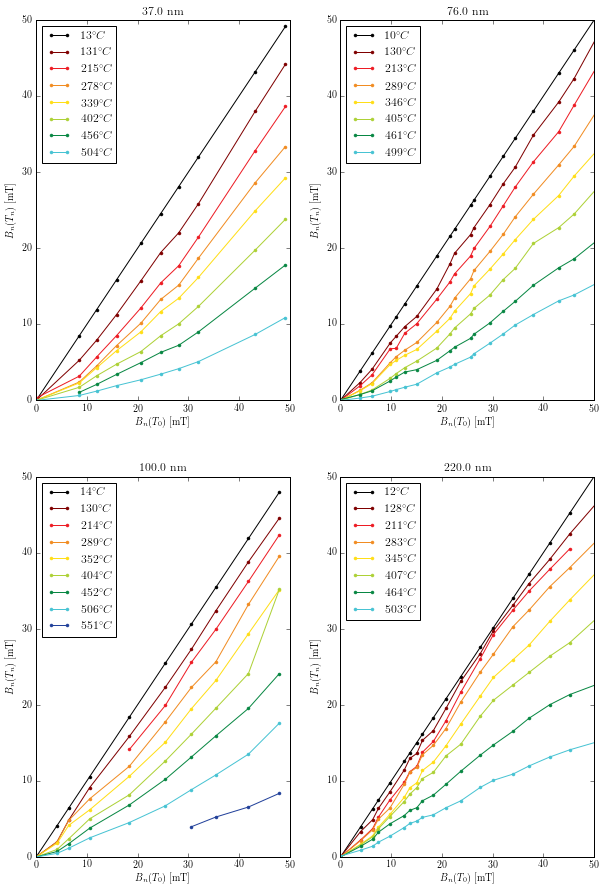

In [19]:
slopes = {}
fig, axes = subplots(2,2, figsize=(10,15))
axes = axes.flatten()
for i, s in enumerate(sorted(data)):
    ax = axes[i]
    slopes.setdefault(s, [])
    newdata = calculate_sample(s)
    temps = sorted(newdata.keys())
    mint = min(temps)
    for t in sorted(newdata):
        xy = np.c_[newdata[mint][:,0]/10, newdata[t][:,0]/10]
        xy = xy[~np.isnan(xy).any(axis=1)]
        line, = ax.plot(xy[:,0], xy[:,1], '.-', color = RockPy3.colorscheme[temps.index(t)], 
             label = '${}^\circ C$'.format(int(t)))
        slope, intercept, r_value, p_value, std_err = stats.linregress(xy[:-1,0], xy[:-1,1])
        #ax.plot((0,50), intercept+slope*np.array((0,50)), color = line.get_color())
        if isnan(slope):
            print(s,t)
        slopes[s].append([t,slope, intercept, r_value, p_value, std_err ])
    slopes[s] = np.array(slopes[s])

    ax.set_xlabel('$B_n(T_0)$ [mT]')
    ax.set_ylabel('$B_n(T_n)$ [mT]')
    ax.set_xlim(0,50)
    ax.set_ylim(0,50)
    ax.legend(loc='best')
    ax.set_title('{} nm'.format(s))

savefig(figure_folder+'/Dunlop1977({})_Bn(T_0)_vs_Bn(T_i).pdf'.format(s))
show()


In [15]:
# format : sname, temp, slope, 1/slope, 1/slope/v
our_data = [['1125', 300, 0.590222928602, '1.69427508072', '0.0056475836024'],
            ['1125', 500, 0.300124299576, '3.33195279893', '0.00666390559787'],
            ['1524', 300, 0.428538557298, '2.33351231288', '0.00777837437627'],
            ['1524', 500, 0.37622590388, '2.65797753341', '0.00531595506682'],
            ['525', 300, 0.560707969545, '1.78345958024', '0.00594486526745'],
            ['525', 500, 0.222095150957, '4.50257466537', '0.00900514933074'],
            ['IXD', 300, 0.485314672156, '2.06051878786', '0.00686839595952'],
            ['IXD', 500, 0.129851999359, '7.70107510811', '0.0154021502162'],
            ['Va', 300, 0.494523844438, '2.02214718511', '0.00674049061703'],
            ['Va', 500, 0.151276880646, '6.61039542679', '0.0132207908536'],
            ['Vb', 300, 0.512144615302, '1.95257349218', '0.00650857830726'],
            ['Vb', 500, 0.13251610828, '7.54625239887', '0.0150925047977']]

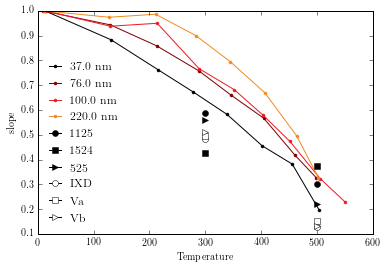

In [20]:
for i,s in enumerate(sorted(slopes)):
    plot(slopes[s][:,0], slopes[s][:,1], '.-', label='{} nm'.format(s), color=RockPy3.colorscheme[i])
    xlabel('Temperature')
    ylabel('slope')

samples = sorted(set(i[0] for i in our_data))
marker = ('o', 's', '>', '^')

for i, sample in enumerate(samples):
    label = sample
    for d in our_data:

        if d[0] == sample:
            if samples.index(sample) < 3:
                gca().plot(d[1], d[2], marker = marker[i%3], label=label, color = 'k')
            else:
                gca().plot(d[1], d[2], marker = marker[i%3], label=label, mfc = 'w', color='k')
            label = None
legend(loc='best', numpoints=1, handlelength=1, frameon=False)
         
savefig(figure_folder+'/Dunlop1977_slope_vs_T.pdf')


In [32]:
import pandas as pd
d=data[220]
temps = sorted(d.keys())
fields = np.linspace(0,500)
d37 = pd.DataFrame(index=fields, columns=temps)

for t in d:
    f = interpolate.interp1d(d[t][:,0], d[t][:,1], bounds_error=False)
    d37[t] = f(fields)

In [33]:
d37

,12.0,128.0,211.0,283.0,345.0,407.0,464.0,503.0
0.000000,0.999992,0.999991,0.999986,0.999985,0.999981,0.999980,0.999978,NaN
10.204082,0.991529,0.989937,0.984985,0.984355,0.979924,0.978872,0.976042,0.961852
20.408163,0.983067,0.979883,0.969983,0.968725,0.959867,0.957764,0.952105,0.918954
30.612245,0.974604,0.969829,0.954982,0.953094,0.939809,0.936656,0.927662,0.876056
40.816327,0.966032,0.957440,0.939981,0.937464,0.919752,0.915548,0.902119,0.824989
51.020408,0.956613,0.942188,0.924979,0.920031,0.899695,0.894440,0.856184,0.769674
61.224490,0.947194,0.926935,0.909978,0.896803,0.879637,0.873332,0.807531,0.669571
71.428571,0.929512,0.911674,0.894977,0.880952,0.857953,0.844939,0.758271,0.589027
81.632653,0.912952,0.895831,0.876541,0.864944,0.831465,0.810971,0.711681,0.535864
91.836735,0.898025,0.879987,0.854170,0.847183,0.804976,0.787990,0.666049,0.489708


In [50]:
x,y = meshgrid(temps, fields/10)
contourf(y,x,d37, 50)

In [11]:
from mpl_toolkits.mplot3d import Axes3D

In [51]:
ax = gcf().gca(projection='3d')
ax.plot_surface(y, x, d37/d37.max(), cmap=cm.coolwarm, antialiased=True)
ax.contourf(y,x,d37, 50)
show()